<a href="https://colab.research.google.com/github/Maher1410/NN-LABS/blob/main/Lab_3_SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.metrics import mean_absolute_error

In [60]:
class activation_fun:
  def sigmoid (v):
    return 1.0/(1+np.exp(-1*v))

  def step_function(v):
    if v < 0:
      return 0
    else:
      return 1

In [61]:
import random

class SinglePerceptron:
    def __init__(self,inputsize,lr):
        self.inputsize=inputsize;
        self.w=np.random.rand(self.inputsize)
        self.w=self.w.reshape(1,-1)
        print(self.w.shape)
        self.lr = lr
        self.history = []
        self.y_pred = []

    def forwardpass(self,x):
        self.sop = np.dot(self.w,x.T)
        self.pred = activation_fun.step_function(self.sop)
        self.y_pred.append(self.pred)

    def error(self,target):
        self.target = target
        self.err = self.target - self.pred
        return self.pred != target

    def update_wieght(self,x):
        self.w = self.w + np.multiply(self.lr*self.err,x)

    def training(self,epoch,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.shuffle_samples()

        for i in range(epoch):
            for x, y in zip(self.x_train, self.y_train):
                x=x.reshape(1,-1)
                self.forwardpass(x)
                if self.error(y):
                    self.update_wieght(x)
            # Calculate mean absolute error
            self.y_predicted = np.array(self.y_pred)
            y_train = np.array(y_train) #convert y_train to anumpy array if it is not already
            print ("train{}".format(y_train.shape))
            mae = mean_absolute_error(self.y_train, self.y_predicted)
            self.history.append(mae)
            print("Epoch {0} of {1} =================================== error: {2}".format(i,epoch,mae))
            self.y_pred.clear()

    def shuffle_samples(self):
        #combine the arrays into a list of tuples
        combined_arrays = list(zip(self.x_train, self.y_train))

        #Shuffle the combined arrays
        random.shuffle(combined_arrays)

        #unzip the shuffled arrays back into separate arrays
        self.x_train, self.y_train = zip(*combined_arrays)

    def plot_history(self):
        x_values = range(0, len(self.history))
        #plot the array against the x-axis values
        plt.plot(x_values, self.history)
        #add labels and title
        plt.xlabel('Epoch')  # Fix typo here. It should be 'xlabel' instead of 'xlable'
        plt.ylabel('Error')
        plt.title('Error VS Epoch')

        #show the plot
        plt.show()


In [62]:
df = pandas.read_csv("/content/drive/MyDrive/LABNN/sonar.csv", header=None)

In [63]:
dataset=df.values

In [64]:
X=dataset[:,0:60].astype(float)
Y=dataset[:,60]

In [65]:
#Encode the vector to be 1 of'M' and 0 if 'R'
encoded_Y = (Y == 'M').astype(int)

In [66]:
Y_train = np.array(encoded_Y)

In [67]:
Y_train = Y_train.reshape(-1,1)

In [68]:
X_train = np.array(X)

In [69]:
X_train.shape, Y_train.shape

((208, 60), (208, 1))

In [70]:
input_size = X_train.shape[1]
print(type(input_size))

<class 'int'>


In [71]:
My_Model = SinglePerceptron(input_size,0.3)

(1, 60)


In [72]:
My_Model.training(100,X_train,Y_train)

train(208, 1)
Epoch 0 of 100 =================================== error: 0.42788461538461536
train(208, 1)
Epoch 1 of 100 =================================== error: 0.3605769230769231
train(208, 1)
Epoch 2 of 100 =================================== error: 0.3701923076923077
train(208, 1)
Epoch 3 of 100 =================================== error: 0.30288461538461536
train(208, 1)
Epoch 4 of 100 =================================== error: 0.34615384615384615
train(208, 1)
Epoch 5 of 100 =================================== error: 0.27884615384615385
train(208, 1)
Epoch 6 of 100 =================================== error: 0.28365384615384615
train(208, 1)
Epoch 7 of 100 =================================== error: 0.2692307692307692
train(208, 1)
Epoch 8 of 100 =================================== error: 0.2548076923076923
train(208, 1)
Epoch 9 of 100 =================================== error: 0.2980769230769231
train(208, 1)
Epoch 10 of 100 =================================== error: 0.2548076923

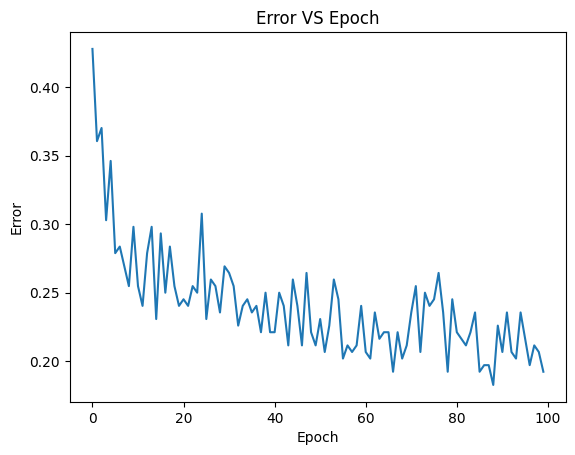

In [73]:
My_Model.plot_history()